# Model Prediksi untuk Ekstraksi Bijih Emas di Perusahaan Tambang <a id='intro'></a>

Sebuah perusahaan yang bergerak dibidang pengembangan solusi efisien untuk industri berat bernama `Zyfra` membutuhkan sebuah `model machine learning` untuk meprediksi hasil ekstraksi bijih emas yang berasal dari tambang. Perushaan ini memberikan kita dataset mentah yaitu dataset `train`, `test` dan `full`. Proses ekstraksi dan pemurnian `emas - Au` dari bijih emas melalui beberapa tahapan `proses teknologi` yaitu proses `flotasi`, `pemurnian tahap primer` dan `pemurnian tahap sekunder`. Disetiap proses `stage` akan menghasilkan konsentrat `emas - Au`, beberapa konsentrat lain dan beberapa `residu`.

Model `machine learning` diharapkan bisa menyingkirkan parameter-parameter lain yang tidak menghasilkan keuntungan dan berfokus pada parameter-parameter yang menghasilkan keuntungan. Untuk mengetahui `model machine learning` memiliki kualitas yang baik diperlukan pengunjian dengan teknik `cross-validation` dan menghitung nilai `SMAPE` `(Symmetry Mean Absolute Percentage Error)`.

Beberapa tujuan dan rumusan masalah untuk projek ini diantaranya:
- Bagaimana distribusi konsentrat logam `Au`, `Ag` dan `Pb` disetiap proses teknologi (`stage`)-nya?
- Mengetahui distribusi ukuran partikel umpan (`umpan`) untuk dataset `train` dan `test`.
- Mengetahui distribusi konsentrat ditiap proses teknologi (`stage`) untuk dataset `train` dan `test`.
- Seberapa banyak fitur/parameter yang bisa direduksi?
- Diantara jenis `model machine learing` berikut: `regresi linier`, `random forest` dan `K-Nearest neighbors`. Manakah yang memberikan hasil terbaik menggunakan teknik skor `cross-validation SMAPE`?
- Berapakah skor `SMAPE` yang dihasilkan oleh `model terbaik` pada dataset `test`?

# Konten <a id='back'></a>

* [Pendahuluan](#intro)
* [Konten](#back)
* [Tahap 1. Pra-pemrosesan Data](#cont_1)
    * [1.1 Memuat Modul](#cont_2) 
    * [1.2 Memuat Dataset](#cont_3)
    * [1.3 Mengecek Duplikasi Data](#cont_4) 
    * [1.4 Perbedaan Parameter Dataset Train dan Test](#cont_5) 
    * [1.5 Mengecek Nilai yang Hilang](#cont_6) 
    * [1.6 Memperbaiki Nilai yang Hilang](#cont_7) 
    * [1.7 Melengkapi Dataset Test Menggunakan Dataset Full](#cont_8) 
* [Tahap 2. Analisis Data Eksploratif (EDA)](#cont_9)
    * [2.1 Analisis Perolehan Emas](#cont_10) 
    * [2.2 Perubahan Konsentrat Logam Au, Ag, Pb](#cont_11) 
    * [2.3 Distribusi Ukuran Partikel Umpan](#cont_12) 
    * [2.4 Distribusi Konsentrat Partikel](#cont_13) 
    * [2.5 Memperbaiki Kualitas Data Train](#cont_14) 
    * [2.6 Memperbaiki Kualitas Data Test](#cont_15) 
* [Tahap 3. Model Machine Learning dalam Ekstraksi Bijih Emas](#cont_16)
    * [3.1 Membuat Fungsi SMAPE (Symmetric Mean Absolute Percentage Error)](#cont_17) 
    * [3.2 Evaluasi Fitur](#cont_18) 
    * [3.3 Evaluasi Model Regresi Linier](#cont_19) 
    * [3.4 Evaluasi Model Regresi Random Forest](#cont_20) 
    * [3.5 Evaluasi Model Regresi K-Nearest Neighbors](#cont_21) 
    * [3.6 Hasil Prediksi Dataset Test](#cont_22) 
* [Tahap 4. Kesimpulan Umum](#cont_23)

# Pra-pemrosesan Data <a id='cont_1'></a>

Tahap pertama yang perlu dilakukan adalah mempersiapkan dataset mulai dari `memuat modul` yang diperlukan, `memuat semua dataset kedalam projek`, `mengecek sampel data`, `mengecek nilai yang hilang`, `mengecek duplikat` dan `melengkapi dataset`.

## Memuat Modul <a id='cont_2'></a>

Selanjutnya kita akan memuat modul yang diperlukan. Disini kita membutuhkan beberapa modul yaitu `pandas` untuk mengolah dataset, `numpy` untuk keperluan numerik, `seaborn` dan `matplotlib` untuk visualisasi data serta `scikit learn` untuk pemodelan `machine learning`. Mari kita muat modul yang dibutuhkan.

In [1]:
# memuat modul
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import make_scorer
from sklearn.feature_selection import SelectKBest, f_regression

# set tema seaborn
sns.set_theme(palette='bright')

## Memuat Dataset <a id='cont_3'></a>

Dataset yang kita punya berasal dari perusahaan secara mentah, terdiri dari dataset `train`, `test` dan `full`. Dataset `test` memiliki parameter yang tidak lengkap dikarenakan hasil perhitungan yang belum selesai akibat pengambilan data yang masih berlangsung.

In [2]:
# memuat dataset train
try:
    train = pd.read_csv('gold_recovery_train.csv',parse_dates=['date'],index_col=['date'])
except:
    train = pd.read_csv('/datasets/gold_recovery_train.csv',parse_dates=['date'],index_col=['date'])

In [3]:
# menampilkan informasi dataset
print(train.info())

# menampilkan sampel dataset
train.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 16860 entries, 2016-01-15 00:00:00 to 2018-08-18 10:59:59
Data columns (total 86 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   final.output.concentrate_ag                         16788 non-null  float64
 1   final.output.concentrate_pb                         16788 non-null  float64
 2   final.output.concentrate_sol                        16490 non-null  float64
 3   final.output.concentrate_au                         16789 non-null  float64
 4   final.output.recovery                               15339 non-null  float64
 5   final.output.tail_ag                                16794 non-null  float64
 6   final.output.tail_pb                                16677 non-null  float64
 7   final.output.tail_sol                               16715 non-null  float64
 8   final.output.tail_au                     

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,
2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,127.092003,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,125.629232,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,123.819808,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,122.270188,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,117.988169,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


Dataset `training` memiliki `86 kolom dan 16860 baris` yang terdiri dari data `numerik` dan `datetime` sebagai index.

In [4]:
# memuat dataset test
try:
    test = pd.read_csv('gold_recovery_test.csv',parse_dates=['date'],index_col=['date'])
except:
    test = pd.read_csv('/datasets/gold_recovery_test.csv',parse_dates=['date'],index_col=['date'])

In [5]:
# menampilkan informasi dataset
print(test.info())

# menampilkan sampel dataset
test.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5856 entries, 2016-09-01 00:59:59 to 2017-12-31 23:59:59
Data columns (total 52 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   primary_cleaner.input.sulfate               5554 non-null   float64
 1   primary_cleaner.input.depressant            5572 non-null   float64
 2   primary_cleaner.input.feed_size             5856 non-null   float64
 3   primary_cleaner.input.xanthate              5690 non-null   float64
 4   primary_cleaner.state.floatbank8_a_air      5840 non-null   float64
 5   primary_cleaner.state.floatbank8_a_level    5840 non-null   float64
 6   primary_cleaner.state.floatbank8_b_air      5840 non-null   float64
 7   primary_cleaner.state.floatbank8_b_level    5840 non-null   float64
 8   primary_cleaner.state.floatbank8_c_air      5840 non-null   float64
 9   primary_cleaner.state.floatbank8_c_level    5840 

,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,
2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,-500.704369,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,-499.240168,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,-502.151509,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,-498.355873,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,-500.810606,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333


Dataset `test` memiliki `52 kolom dan 5856 baris` yang terdiri dari data `numerik` dan `datetime` sebagai index.

In [6]:
# memuat dataset full
try:
    full = pd.read_csv('gold_recovery_full.csv',parse_dates=['date'],index_col=['date'])
except:
    full = pd.read_csv('/datasets/gold_recovery_full.csv',parse_dates=['date'],index_col=['date'])

In [7]:
# menampilkan informasi dataset
print(full.info())

# menampilkan sampel dataset
full.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 22716 entries, 2016-01-15 00:00:00 to 2018-08-18 10:59:59
Data columns (total 86 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   final.output.concentrate_ag                         22627 non-null  float64
 1   final.output.concentrate_pb                         22629 non-null  float64
 2   final.output.concentrate_sol                        22331 non-null  float64
 3   final.output.concentrate_au                         22630 non-null  float64
 4   final.output.recovery                               20753 non-null  float64
 5   final.output.tail_ag                                22633 non-null  float64
 6   final.output.tail_pb                                22516 non-null  float64
 7   final.output.tail_sol                               22445 non-null  float64
 8   final.output.tail_au                     

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,
2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,127.092003,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,125.629232,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,123.819808,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,122.270188,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,117.988169,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


Dataset `full` memiliki `86 kolom dan 22716 baris` yang terdiri dari data `numerik` dan `datetime` sebagai index.

## Mengecek Duplikasi Data <a id='cont_4'></a>

In [8]:
# mengecek duplikasi dataset train
train.reset_index().duplicated().sum()

0

In [9]:
# mengecek duplikasi dataset test
test.reset_index().duplicated().sum()

0

In [10]:
# mengecek duplikasi dataset full
full.reset_index().duplicated().sum()

0

Untuk semua dataset `tidak memiliki duplikat`.

## Perbedaan Parameter Dataset Train dan Test <a id='cont_5'></a>

Disini kita akan melihat beberapa parameter-parameter yang tidak dimiliki dataset `test` dengan mengacu pada dataset `train`.

In [11]:
# parameter yang tidak ada pada dataset test
difference = list(set(train.columns)-set(test.columns))
sorted(difference)

['final.output.concentrate_ag',
 'final.output.concentrate_au',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.recovery',
 'final.output.tail_ag',
 'final.output.tail_au',
 'final.output.tail_pb',
 'final.output.tail_sol',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_au',
 'primary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_sol',
 'rougher.calculation.au_pb_ratio',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_au',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.recovery',
 'rougher.output.tail_ag',
 'rougher.output.tail_au',
 'rougher.output.ta

Berdasarkan hal ini, nampaknya dataset `test` kekurangan `tipe parameter output`. Hal tersebut nampaknya hanya berisi `input` yang diberkan pada `teknologi proses` dan belum sempat diambil data `outputnya`.

## Mengecek Nilai yang Hilang <a id='cont_6'></a>

In [12]:
# persentase missing values untuk dataset train
train_miss = train.isna().sum().sort_values(ascending=False)/len(train)*100
train_miss.head()

rougher.output.recovery              15.260973
rougher.output.tail_ag               13.345196
rougher.output.tail_sol              13.339265
rougher.output.tail_au               13.339265
secondary_cleaner.output.tail_sol    11.779359
dtype: float64

In [13]:
# persentase missing values untuk dataset test
test_miss = test.isna().sum().sort_values(ascending=False)/len(test)*100
test_miss.head()

rougher.input.floatbank11_xanthate    6.028005
primary_cleaner.input.sulfate         5.157104
primary_cleaner.input.depressant      4.849727
rougher.input.floatbank10_sulfate     4.388661
primary_cleaner.input.xanthate        2.834699
dtype: float64

In [14]:
# persentase missing values untuk dataset full
full_miss = full.isna().sum().sort_values(ascending=False)/len(full)*100
full_miss.head()

rougher.output.recovery               13.730410
rougher.output.tail_ag                12.048776
rougher.output.tail_sol               12.044374
rougher.output.tail_au                12.044374
rougher.input.floatbank11_xanthate     9.935728
dtype: float64

Dari ketiga dataset tersebut nampaknya memiliki `nilai yang hilang` cukup banyak dengan persentase tertera untuk setiap parameternya.

## Memperbaiki Nilai yang Hilang <a id='cont_7'></a>

Disini kita akan memperbaikinya dengan nilai `median` untuk masing-masing parameter dikarenakan kita tidak mengetahui adanya `outlier` atau tidak.

In [15]:
# mengisi nilai yang hilang dengan nilai median-nya
imputer = SimpleImputer(strategy='median')

# mengisi nilai yang hilang untuk data train
train_imputed = imputer.fit_transform(train)
train_imputed = pd.DataFrame(train_imputed,columns=train.columns,index=train.index)

# mengisi nilai yang hilang untuk data test
test_imputed = imputer.fit_transform(test)
test_imputed = pd.DataFrame(test_imputed,columns=test.columns,index=test.index)

# mengisi nilai yang hilang untuk data full
full_imputed = imputer.fit_transform(full)
full_imputed = pd.DataFrame(full_imputed,columns=full.columns,index=full.index)

In [16]:
# mengecek kembali nilai yang hilang pada dataset train
train_imputed.isna().sum().sort_values()

final.output.concentrate_ag                           0
rougher.state.floatbank10_e_level                     0
rougher.state.floatbank10_e_air                       0
rougher.state.floatbank10_d_level                     0
rougher.state.floatbank10_d_air                       0
                                                     ..
primary_cleaner.state.floatbank8_c_air                0
primary_cleaner.state.floatbank8_b_level              0
primary_cleaner.state.floatbank8_b_air                0
rougher.calculation.floatbank11_sulfate_to_au_feed    0
secondary_cleaner.state.floatbank6_a_level            0
Length: 86, dtype: int64

In [17]:
# mengecek kembali nilai yang hilang pada dataset test
test_imputed.isna().sum().sort_values()

primary_cleaner.input.sulfate                 0
rougher.state.floatbank10_d_air               0
rougher.state.floatbank10_d_level             0
rougher.state.floatbank10_e_air               0
rougher.state.floatbank10_e_level             0
rougher.state.floatbank10_f_air               0
rougher.state.floatbank10_f_level             0
secondary_cleaner.state.floatbank2_a_air      0
secondary_cleaner.state.floatbank2_a_level    0
secondary_cleaner.state.floatbank2_b_air      0
secondary_cleaner.state.floatbank2_b_level    0
rougher.state.floatbank10_c_level             0
secondary_cleaner.state.floatbank3_a_air      0
secondary_cleaner.state.floatbank3_b_air      0
secondary_cleaner.state.floatbank3_b_level    0
secondary_cleaner.state.floatbank4_a_air      0
secondary_cleaner.state.floatbank4_a_level    0
secondary_cleaner.state.floatbank4_b_air      0
secondary_cleaner.state.floatbank4_b_level    0
secondary_cleaner.state.floatbank5_a_air      0
secondary_cleaner.state.floatbank5_a_lev

In [18]:
# mengecek kembali nilai yang hilang pada dataset full
full_imputed.isna().sum().sort_values()

final.output.concentrate_ag                           0
rougher.state.floatbank10_e_level                     0
rougher.state.floatbank10_e_air                       0
rougher.state.floatbank10_d_level                     0
rougher.state.floatbank10_d_air                       0
                                                     ..
primary_cleaner.state.floatbank8_c_air                0
primary_cleaner.state.floatbank8_b_level              0
primary_cleaner.state.floatbank8_b_air                0
rougher.calculation.floatbank11_sulfate_to_au_feed    0
secondary_cleaner.state.floatbank6_a_level            0
Length: 86, dtype: int64

`Nilai yang hilang` pada setiap dataset sudah berhasil dihilangkan.

## Melengkapi Dataset Test Menggunakan Dataset Full <a id='cont_8'></a>

Selanjutnya kita akan melengkapi parameter yang kurang pada dataset `test` menggunakan dataset `full` dengan mencarinya menggunakan `index` dataset `test`.

In [19]:
# mendupliasi dataset full dan membuang nama kolom yang sama dengan dataset test
temp = full_imputed.copy().drop(test_imputed.columns,axis=1)

# menggabungkan dataset temp dengan dataset test
test_imputed = pd.merge(test_imputed,temp,left_index=True,right_index=True,how='left')

# mengatur nama kolom agar sesuai dengan urutan nama kolom dataset train
test_imputed = test_imputed.loc[:,train_imputed.columns]
test_imputed.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5856 entries, 2016-09-01 00:59:59 to 2017-12-31 23:59:59
Data columns (total 86 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   final.output.concentrate_ag                         5856 non-null   float64
 1   final.output.concentrate_pb                         5856 non-null   float64
 2   final.output.concentrate_sol                        5856 non-null   float64
 3   final.output.concentrate_au                         5856 non-null   float64
 4   final.output.recovery                               5856 non-null   float64
 5   final.output.tail_ag                                5856 non-null   float64
 6   final.output.tail_pb                                5856 non-null   float64
 7   final.output.tail_sol                               5856 non-null   float64
 8   final.output.tail_au                      

Dataset `test` sudah lengkap dan urutan parameternya sudah sesuai dengan dataset `train`.

# Analisis Data Eksplorasi (EDA) <a id='cont_9'></a>

Pada `Analisis Data Eksplorasi (EDA)`, kita akan mengeksplor data untuk mendapatkan `insights` seperti mengetahui parameter `perolehan emas` serta membuat grafik `visualisasi` dengan menggunakan `seaborn`. 

## Analisis Perolehan Emas <a id='cont_10'></a>

Disini kita akan mengkomparasi parameter perolehan emas `recovery` yang ada pada dataset dengan perhitungan manual `calculation` menggunakan rumus `perolehan emas` seperti berikut.

In [20]:
# menghitung perolehan emas dari bijih emas
# formula = Cx(F-T)/Fx(C-T)*100
C = train_imputed['rougher.output.concentrate_au']
F = train_imputed['rougher.input.feed_au']
T = train_imputed['rougher.output.tail_au']

# membuat perhitungan perolehan emas manual
gain_calc = (C*(F-T))/(F*(C-T))*100

# mengecek distribusi gain_calc
gain_calc.describe()

count    1.574500e+04
mean              NaN
std               NaN
min              -inf
25%      7.984719e+01
50%      8.549758e+01
75%      9.073762e+01
max               inf
dtype: float64

Hasil menunjukan adanya nilai `NaN`, `-inf` dan `inf`. Kita akan menghilangkanya nanti, mari kita gabungkan data `recovery` dan `calculation`.

In [21]:
# menggabungkan perolehan recovery dengan perolehan kalkulasi
merge = pd.concat([train_imputed['rougher.output.recovery'],gain_calc],axis=1)
merge.columns = ['recovery','calculation']

In [22]:
# mengganti nilai inf dan -inf dengan NaN
merge['calculation'] = merge['calculation'].replace([np.inf,-np.inf], np.nan)

# menghapus semua missing values
merge.dropna(inplace=True)

# mengecek kembali distribusi kolom manual.count
merge.describe()

,recovery,calculation
count,15701.000000,15701.000000
mean,82.650128,32.541230
std,14.423894,3197.085079
min,0.000000,-366924.161290
25%,80.435925,79.909374
50%,85.235997,85.516148
75%,89.703946,90.752079
max,100.000000,13802.071756


In [23]:
# menghitung skor MAE antara hasil manual dengan hasil recovery
MAE_score = mean_absolute_error(merge['recovery'],merge['calculation'])
print('MAE Score -->', MAE_score)

MAE Score --> 56.831082843744696


Setelah penggabungan dan menghilangkan nilai yang tidak diinginkan. Nilai pada `MAE Score` menunjukan perbedaan yang cukup tinggi, kita tidak bisa menggunakanya sebagai fitur.

## Perubahan Konsentrat Logam Au, Ag, Pb <a id='cont_11'></a>

Disini kita akan mengetahui perubahan konsentrat untuk masing-logam `Au`, `Ag`, `Pb` berdasarkan prosesnya `stage` yang dilaluinya.

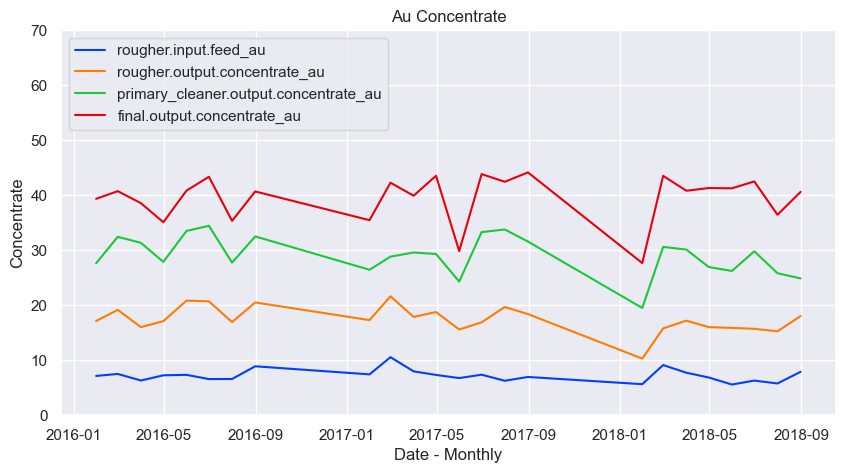

In [24]:
# mengelompokan dataset menjadi bulanan
train_monthly = train_imputed.resample('M').mean()

# menggambar grafik perubahan konsentrasi Logam Au berdasarkan stage
plt.figure(figsize=(10,5))
sns.lineplot(data=train_monthly,y='rougher.input.feed_au',x=train_monthly.index,label='rougher.input.feed_au')
sns.lineplot(data=train_monthly,y='rougher.output.concentrate_au',x=train_monthly.index,label='rougher.output.concentrate_au')
sns.lineplot(data=train_monthly,y='primary_cleaner.output.concentrate_au',x=train_monthly.index,label='primary_cleaner.output.concentrate_au')
sns.lineplot(data=train_monthly,y='final.output.concentrate_au',x=train_monthly.index,label='final.output.concentrate_au')

# menampilkan grafik
plt.legend(loc='upper left')
plt.ylim(0,70)
plt.xlabel('Date - Monthly')
plt.ylabel('Concentrate')
plt.title('Au Concentrate')
plt.show()

Disini konsentrat `emas - Au` memiliki hasil yang cukup baik dan stabil dimana setiap `stage` selalui mengalami peningkatan konsentrat dan konsentrat tertinggi pada konsentrat `final`.

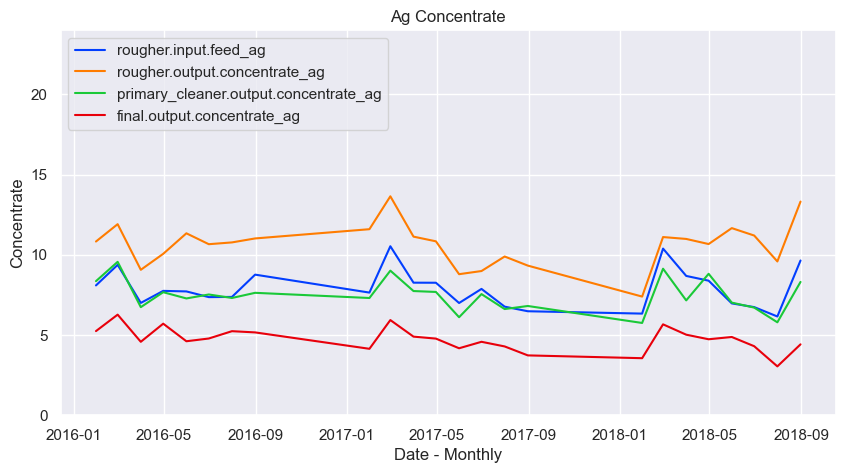

In [25]:
# menggambar grafik perubahan konsentrasi Logam Ag berdasarkan stage
plt.figure(figsize=(10,5))
sns.lineplot(data=train_monthly,y='rougher.input.feed_ag',x=train_monthly.index,label='rougher.input.feed_ag')
sns.lineplot(data=train_monthly,y='rougher.output.concentrate_ag',x=train_monthly.index,label='rougher.output.concentrate_ag')
sns.lineplot(data=train_monthly,y='primary_cleaner.output.concentrate_ag',x=train_monthly.index,label='primary_cleaner.output.concentrate_ag')
sns.lineplot(data=train_monthly,y='final.output.concentrate_ag',x=train_monthly.index,label='final.output.concentrate_ag')

# menampilkan grafik
plt.legend(loc='upper left')
plt.ylim(0,24)
plt.xlabel('Date - Monthly')
plt.ylabel('Concentrate')
plt.title('Ag Concentrate')
plt.show()

Disini konsentrat `perak - Ag` memiliki hasil menunjukan penurunan konsentrat setiap `stage` setelah melalui `pemurnian primer`. Konsentrat meningkat dan tertinggi pada konsentrat `flotasi`.

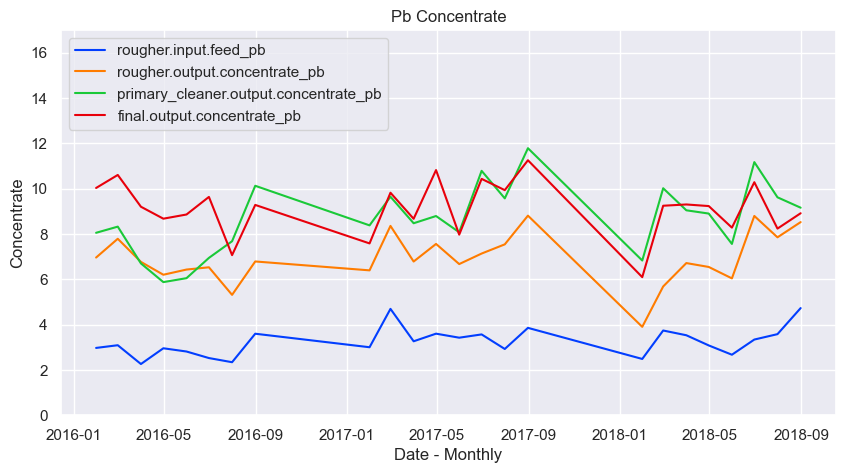

In [26]:
# menggambar grafik perubahan konsentrasi Logam Pb berdasarkan stage
plt.figure(figsize=(10,5))
sns.lineplot(data=train_monthly,y='rougher.input.feed_pb',x=train_monthly.index,label='rougher.input.feed_pb')
sns.lineplot(data=train_monthly,y='rougher.output.concentrate_pb',x=train_monthly.index,label='rougher.output.concentrate_pb')
sns.lineplot(data=train_monthly,y='primary_cleaner.output.concentrate_pb',x=train_monthly.index,label='primary_cleaner.output.concentrate_pb')
sns.lineplot(data=train_monthly,y='final.output.concentrate_pb',x=train_monthly.index,label='final.output.concentrate_pb')

# menampilkan grafik
plt.legend(loc='upper left')
plt.ylim(0,17)
plt.xlabel('Date - Monthly')
plt.ylabel('Concentrate')
plt.title('Pb Concentrate')
plt.show()

Disini konsentrat `timbal - Pb` memiliki hasil yang cukup baik dimana setiap `stage` selalui mengalami peningkatan konsentrat dan konsentrat tertinggi pada konsentrat `primer`.

## Distribusi Ukuran Partikel Umpan <a id='cont_12'></a>

Sekarang kita akan mengetahui distribusi ukuran partikel umpan (`feed`) pada dataset `train` dan `test` menggunkan `kdeplot`.

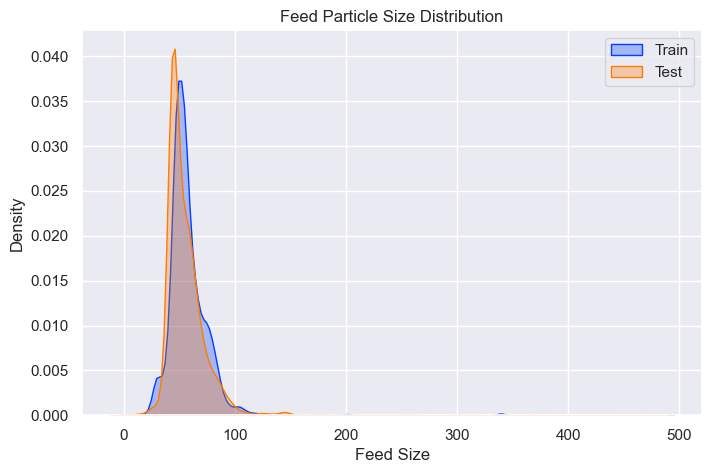

In [27]:
# membuat grafik plot distribusi partikel umpan
plt.figure(figsize=(8,5))
sns.kdeplot(data=train_imputed['rougher.input.feed_size'],alpha=0.3,fill=True,label='Train')
sns.kdeplot(data=test_imputed['rougher.input.feed_size'],alpha=0.3,fill=True,label='Test')
plt.legend()
plt.xlabel('Feed Size')
plt.title('Feed Particle Size Distribution')
plt.show()

Dari grafik menunjukan distribusi variasi ukuran partikel umpan (`feed`) yang seragam yang berada diantara ukuran `30 hingga 110` sehingga bisa dijadikan acuan untuk `model machine learning`.

## Distribusi Konsentrat Partikel <a id='cont_13'></a>

Disini kita akan mengecek apakah distribusi konsentrat partikel memiliki `outliers` baik untuk dataset `train` maupun `test` disetiap `stage`. Outliers akan mengacaukan `machine learning model`.

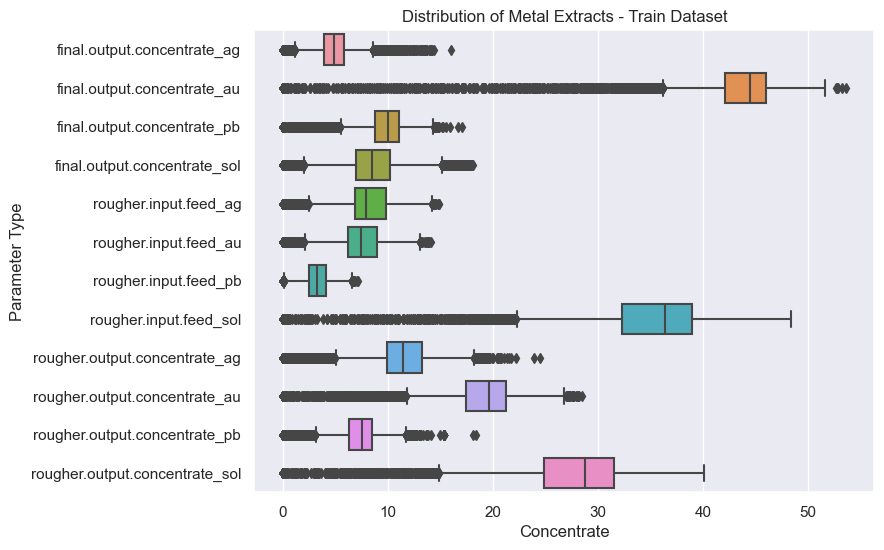

In [28]:
# nama kolom yang akan dicek
columns = [
    'final.output.concentrate_ag',
    'final.output.concentrate_au',
    'final.output.concentrate_pb',
    'final.output.concentrate_sol',
    'rougher.input.feed_ag',
    'rougher.input.feed_au',
    'rougher.input.feed_pb',
    'rougher.input.feed_sol',
    'rougher.output.concentrate_ag',
    'rougher.output.concentrate_au',
    'rougher.output.concentrate_pb',
    'rougher.output.concentrate_sol',
    ]

# membuat boxplot untuk masing-masing logam dan stagenya untuk dataset train
plt.figure(figsize=(8,6))
sns.boxplot(data=train_imputed[columns],orient='h')
plt.xlabel('Concentrate')
plt.ylabel('Parameter Type')
plt.title('Distribution of Metal Extracts - Train Dataset')
plt.show()

Bisa kita lihat pada grafik `boxplot` dataset `train` diatas terdapat `4 stage` yang memiliki `outliers` terbanyak yaitu `final.output.concentrate_au`, `rougher.output.concentrate_au`, `rougher.input.feed_sol`, `rougher.output.concentrate_sol`. 

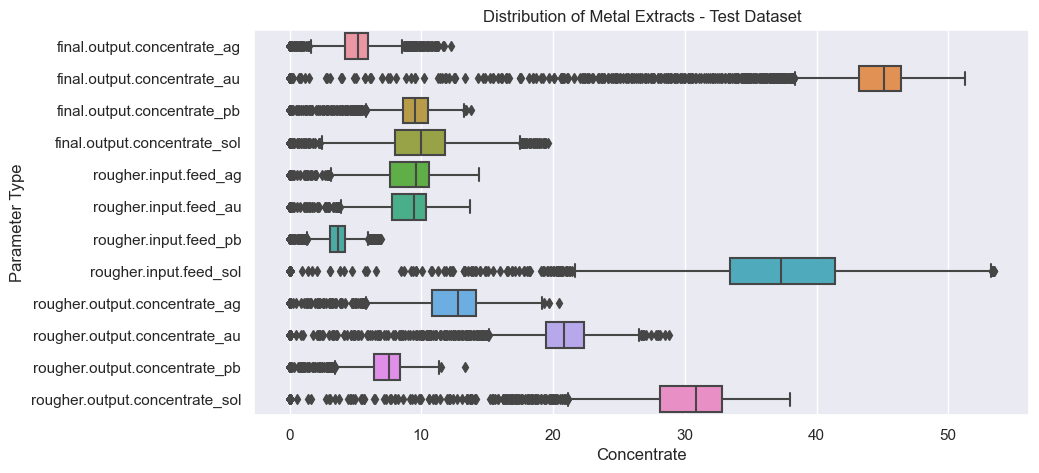

In [29]:
# membuat boxplot untuk masing-masing logam dan stagenya untuk dataset test
plt.figure(figsize=(10,5))
sns.boxplot(data=test_imputed[columns],orient='h')
plt.xlabel('Concentrate')
plt.ylabel('Parameter Type')
plt.title('Distribution of Metal Extracts - Test Dataset')
plt.show()

Bisa kita lihat pada grafik `boxplot` dataset `test` diatas terdapat `4 stage` yang memiliki `outliers` terbanyak yaitu `final.output.concentrate_au`, `rougher.output.concentrate_au`, `rougher.input.feed_sol`, `rougher.output.concentrate_sol`. 

## Memperbaiki Kualitas Data Train <a id='cont_14'></a>

Selanjutnya mari kita hilangkan `outliers` tersebut dengan menghitung `lower limit`, kemudian memfilter dataset.

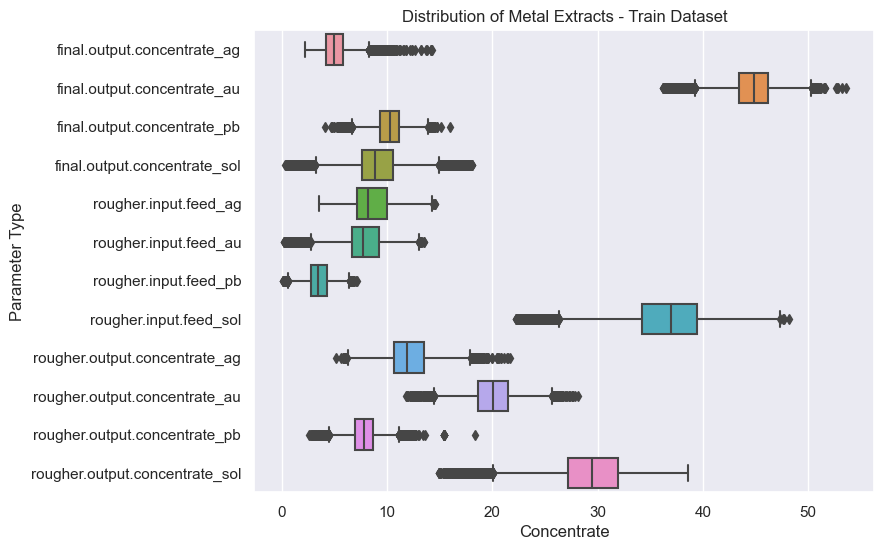

In [30]:
# menghitung Limit Lower dari kolom 'final.output.concentrate_au'
Q1_final = train_imputed['final.output.concentrate_au'].quantile(0.25)
Q3_final = train_imputed['final.output.concentrate_au'].quantile(0.75)
IQR_final = Q3_final - Q1_final
limit_lower_final = Q1_final - (1.5*IQR_final)

# menghitung Limit Lower dari kolom 'rougher.output.concentrate_au'
Q1_rough_au = train_imputed['rougher.output.concentrate_au'].quantile(0.25)
Q3_rough_au = train_imputed['rougher.output.concentrate_au'].quantile(0.75)
IQR_rough_au = Q3_rough_au - Q1_rough_au
limit_lower_rough_au = Q1_rough_au - (1.5*IQR_rough_au)

# menghitung Limit Lower dari kolom 'rougher.input.feed_sol'
Q1_rough_in_sol = train_imputed['rougher.input.feed_sol'].quantile(0.25)
Q3_rough_in_sol = train_imputed['rougher.input.feed_sol'].quantile(0.75)
IQR_rough_in_sol = Q3_rough_in_sol - Q1_rough_in_sol
limit_lower_rough_in_sol = Q1_rough_in_sol - (1.5*IQR_rough_in_sol)

# menghitung Limit Lower dari kolom 'rougher.output.concentrate_sol',
Q1_rough_out_sol = train_imputed['rougher.output.concentrate_sol'].quantile(0.25)
Q3_rough_out_sol = train_imputed['rougher.output.concentrate_sol'].quantile(0.75)
IQR_rough_out_sol = Q3_rough_out_sol - Q1_rough_out_sol
limit_lower_rough_out_sol = Q1_rough_out_sol - (1.5*IQR_rough_out_sol)

# membuang outlier pada dataset train
train_imputed = train_imputed[train_imputed['final.output.concentrate_au'] >= limit_lower_final]
train_imputed = train_imputed[train_imputed['rougher.output.concentrate_au'] >= limit_lower_rough_au]
train_imputed = train_imputed[train_imputed['rougher.input.feed_sol'] >= limit_lower_rough_in_sol]
train_imputed = train_imputed[train_imputed['rougher.output.concentrate_sol'] >= limit_lower_rough_out_sol]

# menampilkan boxplot untuk masing-masing logam dan stagenya untuk dataset train
plt.figure(figsize=(8,6))
sns.boxplot(data=train_imputed[columns],orient='h')
plt.xlabel('Concentrate')
plt.ylabel('Parameter Type')
plt.title('Distribution of Metal Extracts - Train Dataset')
plt.show()

`Outliers` sudah bisa kita hilangkan dari dataset `train`.

## Memperbaiki Kualitas Data Test <a id='cont_15'></a>

Dengan cara yang sama kita hilangkan `outliers` tersebut dengan menghitung `lower limit`, kemudian memfilter dataset.

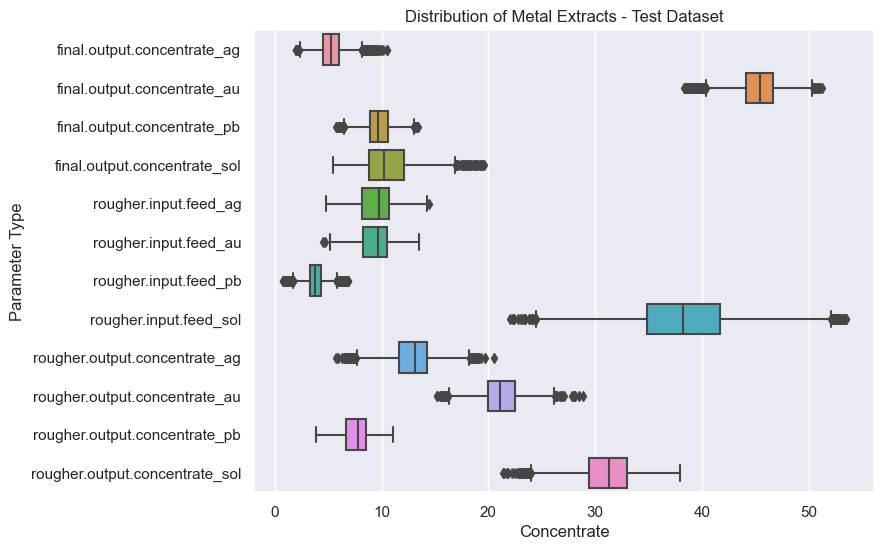

In [31]:
# menghitung Limit Lower dari kolom 'final.output.concentrate_au'
Q1_final = test_imputed['final.output.concentrate_au'].quantile(0.25)
Q3_final = test_imputed['final.output.concentrate_au'].quantile(0.75)
IQR_final = Q3_final - Q1_final
limit_lower_final = Q1_final - (1.5*IQR_final)

# menghitung Limit Lower dari kolom 'rougher.output.concentrate_au'
Q1_rough_au = test_imputed['rougher.output.concentrate_au'].quantile(0.25)
Q3_rough_au = test_imputed['rougher.output.concentrate_au'].quantile(0.75)
IQR_rough_au = Q3_rough_au - Q1_rough_au
limit_lower_rough_au = Q1_rough_au - (1.5*IQR_rough_au)

# menghitung Limit Lower dari kolom 'rougher.input.feed_sol'
Q1_rough_in_sol = test_imputed['rougher.input.feed_sol'].quantile(0.25)
Q3_rough_in_sol = test_imputed['rougher.input.feed_sol'].quantile(0.75)
IQR_rough_in_sol = Q3_rough_in_sol - Q1_rough_in_sol
limit_lower_rough_in_sol = Q1_rough_in_sol - (1.5*IQR_rough_in_sol)

# menghitung Limit Lower dari kolom 'rougher.output.concentrate_sol',
Q1_rough_out_sol = test_imputed['rougher.output.concentrate_sol'].quantile(0.25)
Q3_rough_out_sol = test_imputed['rougher.output.concentrate_sol'].quantile(0.75)
IQR_rough_out_sol = Q3_rough_out_sol - Q1_rough_out_sol
limit_lower_rough_out_sol = Q1_rough_out_sol - (1.5*IQR_rough_out_sol)

# membuang outlier pada dataset test
test_imputed = test_imputed[test_imputed['final.output.concentrate_au'] >= limit_lower_final]
test_imputed = test_imputed[test_imputed['rougher.output.concentrate_au'] >= limit_lower_rough_au]
test_imputed = test_imputed[test_imputed['rougher.input.feed_sol'] >= limit_lower_rough_in_sol]
test_imputed = test_imputed[test_imputed['rougher.output.concentrate_sol'] >= limit_lower_rough_out_sol]

# menampilkan boxplot untuk masing-masing logam dan stagenya untuk dataset test
plt.figure(figsize=(8,6))
sns.boxplot(data=test_imputed[columns],orient='h')
plt.xlabel('Concentrate')
plt.ylabel('Parameter Type')
plt.title('Distribution of Metal Extracts - Test Dataset')
plt.show()

`Outliers` sudah bisa kita hilangkan dari dataset `test`.

# Model Machine Learning dalam Ekstraksi Bijih Emas <a id='cont_16'></a>

Disini kita akan melakukan pembuatan `model machine learning` serta mengevaluasi model tersebut dengan menggunakan teknik `cross-validation` pada fungsi `SMAPE (Symmetric Mean Absolute Percentage Error)`.

## Membuat Fungsi SMAPE (Symmetric Mean Absolute Percentage Error) <a id='cont_17'></a>

`SMAPE` hampir mirip dengan `MAE`, namun `SMAPE` direpresentasikan dalam benutk `nilai relatif`, bukan `nilai absolut` seperti pada `MAE`.

In [32]:
# fungsi untuk menghitung SMAPE (symmetric mean absolute percentage error)
def smape_score(y_true,y_pred):
    # membuat dataframe
    y_true = pd.DataFrame(y_true)
    y_pred = pd.DataFrame(y_pred)
    # mereset index
    y_true = y_true.reset_index(drop=True)
    y_pred = y_pred.reset_index(drop=True)
    # mendefinsikan variabel rough dan final
    y_true_rough = y_true.iloc[:,0]
    y_pred_rough = y_pred.iloc[:,0]
    y_true_final = y_true.iloc[:,1]
    y_pred_final = y_pred.iloc[:,1]

    # for loop untuk menghitung value rough
    temp_rough = []
    for i in range(len(y_pred)):
        # menghitung value tiap baris
        value = (abs(y_true_rough[i] - y_pred_rough[i]))/((abs(y_true_rough[i])+abs(y_pred_rough[i]))/2)
        # menambahkan hasil hitungan kedalam temp_rough
        temp_rough.append(value)
    # menghitung skor SMAPE
    score_rough = sum(temp_rough)/len(y_true)*100

    # for loop untuk menghitung value final
    temp_final = []
    for i in range(len(y_pred)):
        # menghitung value tiap baris
        value = (abs(y_true_final[i] - y_pred_final[i]))/((abs(y_true_final[i])+abs(y_pred_final[i]))/2)
        # menambahkan hasil hitungan kedalam temp_final
        temp_final.append(value)
    # menghitung skor SMAPE
    score_final = sum(temp_final)/len(y_true)*100

    # menghitung skor gabungan
    final_smape = score_rough*0.25 + score_final*0.75

    # mengembalikan skor SMAPE
    return final_smape

## Evaluasi Fitur <a id='cont_18'></a>

Disini kita akan melakukan seleksi `fitur` untuk mengefektifkan kalkulasi dan menghemat waktu. Kita tampilkan kembali semua parameter yang ada pada dataset `full`.

In [33]:
# mengecek nama parameter
full_imputed.columns

Index(['final.output.concentrate_ag', 'final.output.concentrate_pb',
       'final.output.concentrate_sol', 'final.output.concentrate_au',
       'final.output.recovery', 'final.output.tail_ag', 'final.output.tail_pb',
       'final.output.tail_sol', 'final.output.tail_au',
       'primary_cleaner.input.sulfate', 'primary_cleaner.input.depressant',
       'primary_cleaner.input.feed_size', 'primary_cleaner.input.xanthate',
       'primary_cleaner.output.concentrate_ag',
       'primary_cleaner.output.concentrate_pb',
       'primary_cleaner.output.concentrate_sol',
       'primary_cleaner.output.concentrate_au',
       'primary_cleaner.output.tail_ag', 'primary_cleaner.output.tail_pb',
       'primary_cleaner.output.tail_sol', 'primary_cleaner.output.tail_au',
       'primary_cleaner.state.floatbank8_a_air',
       'primary_cleaner.state.floatbank8_a_level',
       'primary_cleaner.state.floatbank8_b_air',
       'primary_cleaner.state.floatbank8_b_level',
       'primary_cleaner.state

Dapat dicermati bahwa terdapat beberapa kolom yang diindikasikan menjadi penyebab kebocoran data diantaranya `final.output.recovery`, `rougher.calculation.sulfate_to_au_concentrate` dan `rougher.output.recovery`. Dikarenakan kita akan menggunakan konsentrat `rough` dan `final` untuk `emas - Au`. Mari kita hapus parameter-parameter tersebut.

In [34]:
# menghapus parameter yang diindikasi menyebabkan kebocoran data
delete = [
    'final.output.recovery',
    'rougher.calculation.sulfate_to_au_concentrate',
    'rougher.output.recovery',
    ]

# menghilangkan parameter diatas pada dataset 
test_imputed.drop(delete,axis=1,inplace=True)
train_imputed.drop(delete,axis=1,inplace=True)

Selanjutnya kita melakukan penskalaan `fitur` dan memisahkanya dari `target`.

In [35]:
# membagi dataset menjadi fitur dan target untuk data train
y1 = train_imputed[['rougher.output.concentrate_au','final.output.concentrate_au']].reset_index(drop=True)
X1 = train_imputed.drop(['rougher.output.concentrate_au','final.output.concentrate_au'],axis=1)

# membagi dataset menjadi fitur dan target untuk data test
y2 = test_imputed[['rougher.output.concentrate_au','final.output.concentrate_au']].reset_index(drop=True)
X2 = test_imputed.drop(['rougher.output.concentrate_au','final.output.concentrate_au'],axis=1)

# menskalakan fitur menggunakan standard scaler
scaler = StandardScaler()
X1 = pd.DataFrame(scaler.fit_transform(X1),columns=X1.columns)
X2 = pd.DataFrame(scaler.transform(X2),columns=X2.columns)

Disini kita akan menggunakan `SelectKBest` dari `scikit-learn` untuk melakukan `scoring fitur` terhadap `target` dan menyeleksinya berdasarkan skor tertinggi.

In [36]:
# menyeleksi fitur yang terbaik menggunakan data train
# hubungan fitur dengan konsentrat rough
selector = SelectKBest(score_func=f_regression,k=10)
X_selected = selector.fit_transform(X1, y1.iloc[:,0])
feature_scores = selector.scores_
data = []
for score, col in enumerate(X1.columns):
    data.append([col,feature_scores[score]])
rough_col = pd.DataFrame(data,columns=['parameter','score']).sort_values(by='score',ascending=False).head(20)
rough_col

,parameter,score
42,rougher.output.concentrate_sol,17226.567077
43,rougher.output.tail_ag,6004.994522
46,rougher.output.tail_au,4043.569500
6,final.output.tail_au,3587.721367
18,primary_cleaner.output.tail_au,3042.486122
35,rougher.input.feed_au,2648.619862
45,rougher.output.tail_sol,2083.122619
34,rougher.input.feed_sol,2082.217138
2,final.output.concentrate_sol,1904.290774
71,secondary_cleaner.state.floatbank4_a_air,1409.912683


In [37]:
# menyeleksi fitur yang terbaik menggunakan data train
# hubungan fitur dengan konsentrat final
selector = SelectKBest(score_func=f_regression,k=10)
X_selected = selector.fit_transform(X1, y1.iloc[:,1])
feature_scores = selector.scores_
data = []
for score, col in enumerate(X1.columns):
    data.append([col,feature_scores[score]])
final_col = pd.DataFrame(data,columns=['parameter','score']).sort_values(by='score',ascending=False).head(20)
final_col

,parameter,score
0,final.output.concentrate_ag,11910.936331
11,primary_cleaner.output.concentrate_ag,1844.880019
1,final.output.concentrate_pb,1382.755920
34,rougher.input.feed_sol,813.485506
48,rougher.state.floatbank10_a_level,771.717031
32,rougher.input.feed_rate,725.988307
14,primary_cleaner.output.concentrate_au,661.583222
30,rougher.input.feed_ag,655.455184
46,rougher.output.tail_au,549.671738
6,final.output.tail_au,519.264669


Dari tabel diatas bisa terlihat `20 fitur` yang memiliki skor tertinggi untuk `target rough` maupun `target final`. Mari kita ambil fitur-fitur tersebut.

In [38]:
# mengambil 20 nama kolom terbaik dari masing-masing grup dan menggabungkanya
set1 = rough_col['parameter'].to_list()
set2 = final_col['parameter'].to_list()
final_col = list(set(set1+set2))
print('Jumlah fitur sekarang -->', len(final_col))

Jumlah fitur sekarang --> 31


Disini kita filter `filter` dataset `train` dan `test` menggunakan nama kolom `final_col` yang terpilih.

In [39]:
# seleksi akhir fitur X1 dan X2
X1 = X1.loc[:,final_col]
X2 = X2.loc[:,final_col]

## Evaluasi Model Regresi Linier <a id='cont_19'></a>

Disini kita akan mencoba evaluasi `model machine learning` menggunakan `regresi linier`.

In [40]:
# membagi dataset train menjadi dua yaitu untuk training(75%) dan validasi(25%)
X_train, X_valid, y_train, y_valid = train_test_split(X1,y1,random_state=12345, test_size=0.25)

# membuat model linier regresi
linreg = LinearRegression()

# melatih model
linreg.fit(X_train,y_train)

# membuat berdasarkan model linier regresi
y_pred = pd.DataFrame(linreg.predict(X_valid),columns=['rough','final'])
y_pred.head()

,rough,final
0,22.257509,46.037498
1,20.997663,44.430631
2,17.896502,44.400890
3,19.561221,44.814210
4,22.010226,42.431553


In [41]:
# menghitung skor smape final
score = smape_score(y_valid,y_pred)

# menampilkan skor smape final
print('Final Score without Cross Validation (SMAPE) -->',score.round(2),'%')

Final Score without Cross Validation (SMAPE) --> 2.13 %


In [42]:
# menjadikan fungsi smape_score menjadi nilai skor cross validation
sMAPE = make_scorer(smape_score)

# menggunakan cross valiadtion
linreg_score = cross_val_score(linreg,X1,y1,cv=5,scoring=sMAPE).mean()
print('Cross Validation (SMAPE-Linreg) -->',linreg_score.round(2),'%')

Cross Validation (SMAPE-Linreg) --> 2.65 %


Bisa kita lihat untuk `model machine learning` menggunakan `regresi linier` menghasilkan skor `SMAPE` yang hampir sama, baik `without cross-validation` maupun `cross-validation` yang berkisar pada `2%`.

## Evaluasi Model Regresi Random Forest <a id='cont_20'></a>

Dengan cara yang sama kita akan mencoba evaluasi `model machine learning` menggunakan `random forest regressor`.

In [43]:
# menguji performa model random forest dengan `n_estimators=1~20` dan kedalaman `max_depth=1-5`
# variabel penampungan
best_depth = 10000
best_trees = 10000
best_smape = 10000

# membuat for loop model
for tree in range(1,21,5):
    for depth in range(1,6):
        random_forest = RandomForestRegressor(n_estimators=tree,max_depth=depth,random_state=12345)
        random_forest.fit(X_train,y_train)
        y_pred = random_forest.predict(X_valid)
        smape_score = cross_val_score(random_forest,X1,y1,cv=5,scoring=sMAPE).mean()
        if smape_score < best_smape:
            best_depth = depth
            best_trees = tree
            best_smape = smape_score

# menampilkan hasil
print('Cross Validation (SMAPE-random_forest) -->','depth:',best_depth,'tree:',best_trees,'SMAPE:',best_smape.round(2),'%')

Cross Validation (SMAPE-random_forest) --> depth: 5 tree: 11 SMAPE: 3.89 %


Bisa kita peroleh bahwa menggunakan `random forest regressor` akan menghasilkan skor `cross-validation SMAPE` terbaik sebesar `3.89%` menggunakan `tree: 11` dan `depth: 5`.

## Evaluasi Model Regresi K-Nearest Neighbors <a id='cont_21'></a>

Dengan cara yang sama kita akan mencoba evaluasi `model machine learning` menggunakan `K-Nearest regressor`.

In [44]:
# menguji performa model KNN dengan `n_neighbors=1~30`
# variabel penampungan
best_n = 10000
best_smape = 10000
# membuat for loop model
for n in range(1,31):
    KNN = KNeighborsRegressor(n_neighbors=n)
    KNN.fit(X_train,y_train)
    y_pred = KNN.predict(X_valid)
    smape_score = cross_val_score(KNN,X1,y1,cv=5,scoring=sMAPE).mean()
    if smape_score < best_smape:
        best_n = n
        best_smape = smape_score

# menampilkan hasil
print('Cross Validation (SMAPE-KNN) -->','n:',best_n,'SMAPE:',best_smape.round(2),'%')

Cross Validation (SMAPE-KNN) --> n: 21 SMAPE: 3.78 %


Bisa kita peroleh bahwa menggunakan `K-Nearest regressor` akan menghasilkan skor `cross-validation SMAPE` terbaik sebesar `3.78%` menggunakan `n_neighbors: 21`.

Dari ketiga `model machine learning` diperoleh `model` terbaik yaitu `regresi liner` kemudian `K-Nearest regressor` dan `random forest regressor`.

## Hasil Prediksi Dataset Test <a id='cont_22'></a>

Disini kita akan melatih model terbaik `regresi linier` menggunakan dataset `train` kemudian melakukan prediksi menggunakan dataset `test`. Tidak lupa kita akan menghitung skor `cross-validation SMAPE`.

In [45]:
# melatih model terbaik menggunakan dataset train
best_model = LinearRegression()
best_model.fit(X1,y1)

# hasil prediksi menggunakan model terbaik
y_pred = best_model.predict(X2)

# menghitung skor SMAPE
linreg_score = cross_val_score(best_model,X2,y2,cv=5,scoring=sMAPE).mean()
print('Cross Validation (SMAPE-best_model) -->',linreg_score.round(2),'%')

Cross Validation (SMAPE-best_model) --> 3.39 %


Bisa kita lihat skor `cross-validation SMAPE` untuk dataset `test` berkisar `3.39%`, bisa kita katakan cukup baik untuk bisa mempertahankan skor yang rendah.

# Kesimpulan Umum <a id='cont_23'></a>

Proses ekstraksi dan pemurnian `emas - Au` dari bijih emas merupakan proses yang kompleks dan melibatkan banyak parameter didalamnya. Dataset projek sudah diproses pada tahap `Pra-pemrosesan Data`, kemudian dilanjutkan dengan `Analisis Data Eksplorasi (EDA)` untuk mendapatkan wawasan `(insights)` dan terakhir melatih `model machine learning`. Beberapa kesimpulan umum dari projek ini dirangkumkan sebagai berikut:
- Dataset `test` memiliki parameter yang hilang berupa `output` yang merupakan hasil pengamatan dikarenakan pengamatan belum selesai dilakukan. Dataset `test` sudah berhasil dilengkapi menggunakan dataset `full`.
- Besarnya konsentrat logam `Au`, `Ag` dan `Pb` berdasarkan proses teknologi (`stage`) mengalami kenaikan secara umum untuk logam `Au` dan `Pb` kecuali logam `Ag` yang mengalami penurunan setelah proses `pemurnian primer`.
- Distribusi ukuran partikel umpan (`feed`) untuk dataset `train` dan `test` memiliki ragam variasi ukuran yang sama antaara `30 hingga 110`. Hal ini akan membantu `model machine learning` dalam belajar.
- Distribusi konsentrat ditiap proses teknologi (`stage`) baik dataset `train` maupun `test` menghasilkan `outlier` pada `stage` berikut:`final.output.concentrate_au`, `rougher.output.concentrate_au`, `rougher.input.feed_sol`, `rougher.output.concentrate_sol`. Hal ini akan menyulitkan `model machine learning` dalam belajar.
- Evaluasi fitur `model machine learning` bisa mereduksi fitur dari `84` menjadi `31` fitur.
- `model machine learning` yang diujikan diantaranya `regresi linier`, `random forest` dan `K-Nearest neighbors`. Hasil terbaik diperoleh `regresi linier` dengan skor `SMAPE` terendah.
- Hasil prediksi dataset `test` menggunakan model terbaik menghasilkan skor `SMAPE` sebesar `3.39%`.